In [1]:
#ignoring warnings
import warnings
warnings.simplefilter('ignore')

#importing neccesary modules
import sys
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
from dateutil.parser import parse
import time
from datetime import datetime, timezone
from dateutil import parser
import oandapyV20.endpoints.instruments as instruments
import configparser
import json
from oandapyV20 import API
import oandapyV20.endpoints.positions as positions
import oandapyV20.endpoints.trades as trades
from oandapyV20.endpoints.pricing import PricingStream
import oandapyV20.endpoints.orders as orders
import oandapyV20.endpoints.accounts as accounts
from oandapyV20.contrib.factories import InstrumentsCandlesFactory

In [2]:
#https://oanda-api-v20.readthedocs.io/en/latest/index.html
config = configparser.ConfigParser()
config.read('oanda.cfg')

client = API(access_token=config['oanda']['access_token'])

In [3]:
import json
from oandapyV20 import API
from oandapyV20.contrib.factories import InstrumentsCandlesFactory
import pandas as pd


def get_data(granularity, instrument, save_csv=False):
    client = API(access_token="e11aadc917842adf254cd73c038c4e0a-321ea21ac5697ab46036807f5e5e943d")
    

    params = {

        "granularity": granularity,
        "count": 2000,
     }
    df = pd.DataFrame(columns=["Date", 'Open', 'High', 'Low', 'Close', "Volume"])
    for r in InstrumentsCandlesFactory(instrument=instrument, params=params):
            rv = client.request(r)
            results = [{"Date":candle['time'][0:19], "Open":float(candle['mid']['o']),
                        "High":float(candle['mid']['h']), "Low":float(candle['mid']['l']),
                       "Close":float(candle['mid']['c']), "Volume": float(candle['volume'])
                       } for candle in r.response.get('candles')]
            df = df.append(pd.DataFrame(results), ignore_index=True)

    df.set_index("Date", inplace=True)
    if save_csv:
        df.to_csv(instrument + "_" + granularity + ".csv")
    return df

In [4]:
df = get_data(instrument = "WTICO_USD", granularity = "D", save_csv = False)
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-02-23T22:00:00,94.328,102.221,92.975,94.565,498088.0
2022-02-24T22:00:00,94.944,97.220,91.509,93.378,337058.0
2022-02-27T22:00:00,100.141,100.288,95.765,97.221,281703.0
2022-02-28T22:00:00,97.386,108.225,96.645,107.714,389176.0
2022-03-01T22:00:00,108.801,110.740,106.748,109.807,50533.0


In [5]:
import talib as ta
from talib import MA_Type

def generate_features(df):
    """ Generate features for a stock/index/currency/commodity based on historical price and performance
    Args:
        df (dataframe with columns "open", "close", "high", "low", "volume")
    Returns:
        dataframe, data set with new features
    """
    df_new = pd.DataFrame()
    
    # 6 original features
    df_new['Close'] = df['Close']
    df_new['Open'] = df['Open']   
    df_new['High'] = df['High']  
    df_new['Low'] = df['Low']    
    df_new['Volume'] = df['Volume']
    
    df_new['EMA_5'] = ta.EMA(df['Close'], timeperiod=5)
    df_new['EMA_15'] = ta.EMA(df['Close'], timeperiod=15)
    df_new['EMA_30'] = ta.EMA(df['Close'], timeperiod=30)
    df_new['EMA_60'] = ta.EMA(df['Close'], timeperiod=60)
    df_new['EMA_90'] = ta.EMA(df['Close'], timeperiod=90)
    df_new['EMA_150'] = ta.EMA(df['Close'], timeperiod=150)
    df_new['EMA_200'] = ta.EMA(df['Close'], timeperiod=200)
    
    df_new['MFI_5'] = ta.MFI(df['High'], df['Low'], df['Close'], df['Volume'], timeperiod=5)
    df_new['MFI_15'] = ta.MFI(df['High'], df['Low'], df['Close'], df['Volume'], timeperiod=15)
    df_new['MFI_30'] = ta.MFI(df['High'], df['Low'], df['Close'], df['Volume'], timeperiod=30)
    df_new['MFI_60'] = ta.MFI(df['High'], df['Low'], df['Close'], df['Volume'], timeperiod=60)
    df_new['MFI_90'] = ta.MFI(df['High'], df['Low'], df['Close'],df['Volume'], timeperiod=90)
    
    
   

    
  
    df_new = df_new.dropna(axis=0)
    return df_new

In [6]:
df = generate_features(df)
df.tail()

,Close,Open,High,Low,Volume,EMA_5,EMA_15,EMA_30,EMA_60,EMA_90,EMA_150,EMA_200,MFI_5,MFI_15,MFI_30,MFI_60,MFI_90
Date,,,,,,,,,,,,,,,,,
2022-02-23T22:00:00,94.565,94.328,102.221,92.975,498088.0,93.726890,92.125537,89.295735,85.167734,82.563072,78.649181,75.809690,68.483036,59.232934,66.468604,66.561228,55.297172
2022-02-24T22:00:00,93.378,94.944,97.220,91.509,337058.0,93.610593,92.282095,89.559107,85.436923,82.800763,78.844265,75.984499,63.918803,51.635415,62.102812,65.966249,54.270225
2022-02-27T22:00:00,97.221,100.141,100.288,95.765,281703.0,94.814062,92.899458,90.053423,85.823287,83.117691,79.087665,76.195807,66.732414,58.018888,63.474810,66.436915,54.990214
2022-02-28T22:00:00,107.714,97.386,108.225,96.645,389176.0,99.114041,94.751276,91.192815,86.541015,83.658270,79.466822,76.509421,69.464962,65.463449,65.060767,67.412116,56.137322
2022-03-01T22:00:00,109.807,108.801,110.740,106.748,50533.0,102.678361,96.633241,92.393730,87.303834,84.232967,79.868679,76.840740,79.338851,68.528912,64.581714,67.134462,56.616406


In [7]:
df = df.reset_index()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1801 non-null   object 
 1   Close    1801 non-null   float64
 2   Open     1801 non-null   float64
 3   High     1801 non-null   float64
 4   Low      1801 non-null   float64
 5   Volume   1801 non-null   float64
 6   EMA_5    1801 non-null   float64
 7   EMA_15   1801 non-null   float64
 8   EMA_30   1801 non-null   float64
 9   EMA_60   1801 non-null   float64
 10  EMA_90   1801 non-null   float64
 11  EMA_150  1801 non-null   float64
 12  EMA_200  1801 non-null   float64
 13  MFI_5    1801 non-null   float64
 14  MFI_15   1801 non-null   float64
 15  MFI_30   1801 non-null   float64
 16  MFI_60   1801 non-null   float64
 17  MFI_90   1801 non-null   float64
dtypes: float64(17), object(1)
memory usage: 253.4+ KB


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import requests
sns.set()

In [10]:
number_simulation = 2000
# Here one can adopt the expression to hours or days or whatever expression fits well. 
# In this example case it is days
predict_days = 5

In [11]:


v = df[['Close', 'EMA_30', 'EMA_60']].pct_change(1).dropna().values
variance = np.linalg.cholesky(np.cov(v.T))
daily_vol = np.sqrt(variance)
avg_daily_ret = np.mean(v,axis=0)
daily_drift = avg_daily_ret - (variance / 2)
drift = daily_drift - 0.5 * daily_vol ** 2

results = pd.DataFrame()

for i in tqdm(range(number_simulation)):
    prices = []
    prices.append(df['Close'].iloc[-1])
    for d in range(predict_days):
        shock = drift + daily_vol * np.random.normal()
        price = prices[-1] * np.exp(shock)[-1,-1]
        prices.append(price)
    results[i] = prices



100%|████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 2165.57it/s]


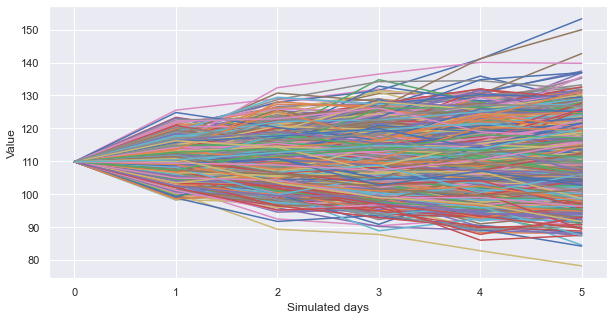

In [12]:
plt.figure(figsize=(10,5))
plt.plot(results)
plt.ylabel('Value')
plt.xlabel('Simulated days')
plt.show()

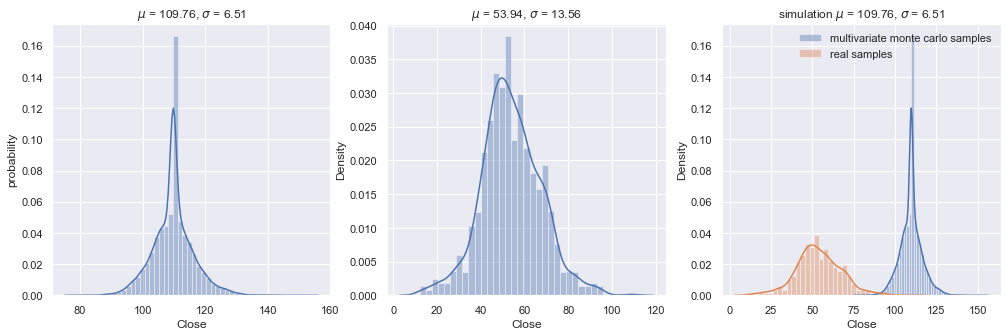

In [13]:
raveled = results.values.ravel()
raveled.sort()

plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
sns.distplot(raveled,norm_hist=True)
plt.xlabel('Close')
plt.ylabel('probability')
plt.title('$\mu$ = %.2f, $\sigma$ = %.2f'%(raveled.mean(),raveled.std()))

plt.subplot(1,3,2)
sns.distplot(df['Close'],norm_hist=True)
plt.title('$\mu$ = %.2f, $\sigma$ = %.2f'%(np.mean(df['Close']),np.std(df['Close'])))

plt.subplot(1,3,3)
sns.distplot(raveled,norm_hist=True,label='multivariate monte carlo samples')
sns.distplot(df['Close'],norm_hist=True,label='real samples')
plt.title('simulation $\mu$ = %.2f, $\sigma$ = %.2f'%(raveled.mean(),raveled.std()))
plt.legend()
plt.show()


In [14]:
df.tail()

,Date,Close,Open,High,Low,Volume,EMA_5,EMA_15,EMA_30,EMA_60,EMA_90,EMA_150,EMA_200,MFI_5,MFI_15,MFI_30,MFI_60,MFI_90
1796,2022-02-23T22:00:00,94.565,94.328,102.221,92.975,498088.0,93.726890,92.125537,89.295735,85.167734,82.563072,78.649181,75.809690,68.483036,59.232934,66.468604,66.561228,55.297172
1797,2022-02-24T22:00:00,93.378,94.944,97.220,91.509,337058.0,93.610593,92.282095,89.559107,85.436923,82.800763,78.844265,75.984499,63.918803,51.635415,62.102812,65.966249,54.270225
1798,2022-02-27T22:00:00,97.221,100.141,100.288,95.765,281703.0,94.814062,92.899458,90.053423,85.823287,83.117691,79.087665,76.195807,66.732414,58.018888,63.474810,66.436915,54.990214
1799,2022-02-28T22:00:00,107.714,97.386,108.225,96.645,389176.0,99.114041,94.751276,91.192815,86.541015,83.658270,79.466822,76.509421,69.464962,65.463449,65.060767,67.412116,56.137322
1800,2022-03-01T22:00:00,109.807,108.801,110.740,106.748,50533.0,102.678361,96.633241,92.393730,87.303834,84.232967,79.868679,76.840740,79.338851,68.528912,64.581714,67.134462,56.616406
